### 1. 傅里叶变换

#### 1-1）尝试分析F1，F2，F1-F2的频谱信息
#### 1-2）是否和我们先前讲解的例子对应上，你找自己拍摄的一幅照片，缩小成256x256，利用f1,f2,f1-f2进行卷积，观察得到的图像特性？
#### 1-3）如果频谱信息和我们所说的对应不上，为什么？

f1: 
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
f2: 
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.        ]
 [0

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


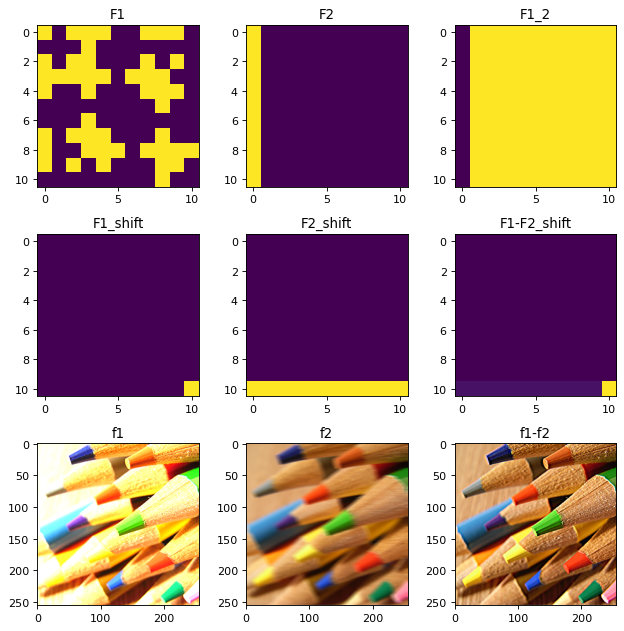

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

f1 = np.zeros([11, 11])
f1[5, 5] = 2
f2 = np.vstack((np.zeros([5, 11]), 1 / 11 * np.ones([1, 11]), np.zeros([5, 11])))
f1_2 = f1 - f2

print('f1: \n{}\nf2: \n{}\nf1-f2: \n{}'.format(f1,f2,f1_2))
#
# np.fft.fft2 返回复数数组
# np.fft.fftshift 将0频率分量移动到矩阵中心
#
F1 = np.fft.fft2(f1)
F1_shift = np.fft.fftshift(f1)
F2 = np.fft.fft2(f2)
F2_shift = np.fft.fftshift(f2)
F1_2 = np.fft.fft2(f1_2)
F1_2_shift = np.fft.fftshift(f1_2)

# print
plt.figure(figsize=(8, 8), dpi=80)

plt.subplot(331).set_title('F1')
plt.imshow(np.abs(F1))
plt.subplot(332).set_title('F2')
plt.imshow(np.abs(F2))
plt.subplot(333).set_title('F1_2')
plt.imshow(np.abs(F1_2))

plt.subplot(334).set_title('F1_shift')
plt.imshow(np.abs(F1_shift))
plt.subplot(335).set_title('F2_shift')
plt.imshow(np.abs(F2_shift))
plt.subplot(336).set_title('F1-F2_shift')
plt.imshow(np.abs(F1_2_shift))

# plt.subplot(234)
img = plt.imread("../pics/sample-5.png")

# img=img/255
img1 = cv2.filter2D(img, -1, f1)
img2 = cv2.filter2D(img, -1, f2)
img3 = cv2.filter2D(img, -1, f1_2)

plt.subplot(337).set_title('f1')
plt.imshow(img1)
plt.subplot(338).set_title('f2')
plt.imshow(img2)
plt.subplot(339).set_title('f1-f2')
plt.imshow(img3)

plt.tight_layout()

### 2. 离散余弦变换
#### 2-1）尝试利用离散余弦变换分析f1，f2，f1-f2的频谱信息
#### 2-2）如果频谱信息和我们所说的对应不上，为什么？

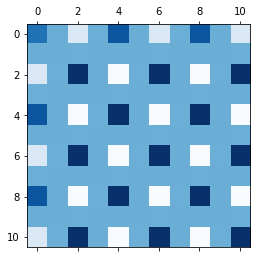

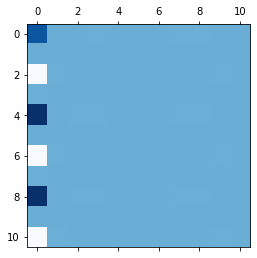

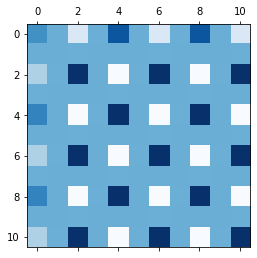

In [2]:
from math import sqrt, cos


def dct_trans(img):
    def alpha(u, X):
        if u == 0:
            return sqrt(1 / X)
        elif u <= X - 1:
            return sqrt(2 / X)
        else:
            raise TypeError

    def cos_mat(u, v, X, Y):
        mat = np.ones([X, Y])
        for x in range(X):
            for y in range(Y):
                # print(cos(np.pi * (2 * x + 1) * u / 2 / X))
                mat[x][y] = cos(np.pi * (2 * x + 1) * u / 2 / X) * cos(np.pi * (2 * y + 1) * v / 2 / Y)
        return mat

    [X, Y] = img.shape
    mat = np.ones([X, Y])
    for u in range(X):
        for v in range(Y):
            a_u = alpha(u, X)
            a_v = alpha(v, Y)
            cos_XY = cos_mat(u, v, X, Y)
            mat[u][v] = a_u * a_v * np.sum(np.multiply(img, cos_XY))
    return mat

dct_1 = dct_trans(f1)
dct_2 = dct_trans(f2)
dct_1_2 = dct_trans(f1_2)
plt.matshow(dct_1, cmap='Blues')
plt.matshow(dct_2, cmap='Blues')
plt.matshow(dct_1_2, cmap='Blues')

